In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

λ = 0.5, E[T] = 2.0798
λ = 0.6, E[T] = 2.4940
λ = 0.7, E[T] = 3.3279
λ = 0.8, E[T] = 4.7599
λ = 0.9, E[T] = 9.4062


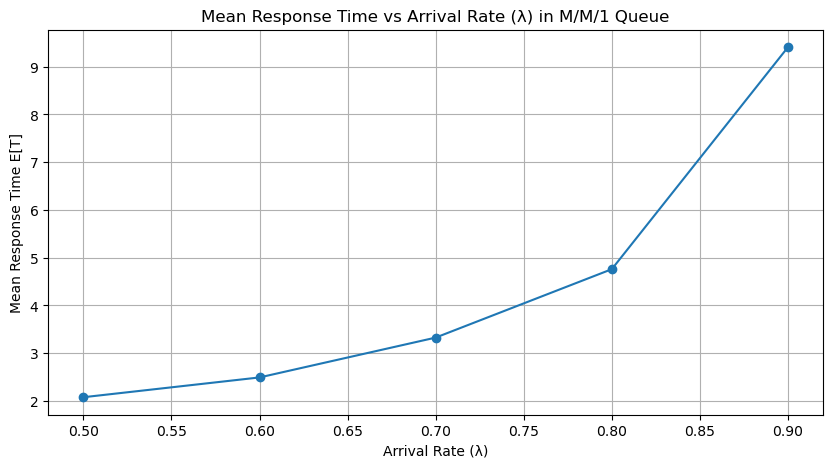

In [13]:
def simulate_mm1_queue(lambda_val, num_jobs=10000):
    # Generate interarrival times from an exponential distribution with rate lambda
    interarrival_times = np.random.exponential(1/lambda_val, num_jobs)
    # Generate service times from an exponential distribution with rate 1 (μ = 1)
    service_times = np.random.exponential(1, num_jobs)
    
    # Calculate arrival times by cumulatively summing the interarrival times
    arrival_times = np.cumsum(interarrival_times)
    # Initialize arrays to store the start service times, departure times, and response times
    start_service_times = np.zeros(num_jobs)
    departure_times = np.zeros(num_jobs)
    response_times = np.zeros(num_jobs)
    
    # Simulate the queue process for each job
    for i in range(num_jobs):
        if i == 0:
            # The first job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service when they arrive or when the previous job departs, whichever is later
            start_service_times[i] = max(arrival_times[i], departure_times[i-1])
        # Departure time is the start service time plus the service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is the departure time minus the arrival time
        response_times[i] = departure_times[i] - arrival_times[i]
    
    # Calculate the mean response time across all jobs
    mean_response_time = np.mean(response_times)
    return mean_response_time  # Return the mean response time

def plot_mean_response_times(lambda_values, mean_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o')  # Plot the mean response times with circular markers
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

# Define the different lambda values for the simulation
lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]
mean_response_times = []  # Initialize an empty list to store the mean response times

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time = simulate_mm1_queue(lambda_val)  # Run the simulation for the current lambda
    mean_response_times.append(mean_response_time)  # Append the result to the list
    print(f"λ = {lambda_val}, E[T] = {mean_response_time:.4f}")  # Print the result

plot_mean_response_times(lambda_values, mean_response_times)  # Plot the results


In [ ]:
"""
Adding "adversary" to queue program
"""

λ = 0.5, E[T] (Regular) = 2.7274, E[T] (Adversary) = 2.1400
λ = 0.6, E[T] (Regular) = 3.6930, E[T] (Adversary) = 2.4433
λ = 0.7, E[T] (Regular) = 8.0779, E[T] (Adversary) = 3.1278
λ = 0.8, E[T] (Regular) = 20.5506, E[T] (Adversary) = 6.5275
λ = 0.9, E[T] (Regular) = 173.0525, E[T] (Adversary) = 145.8061


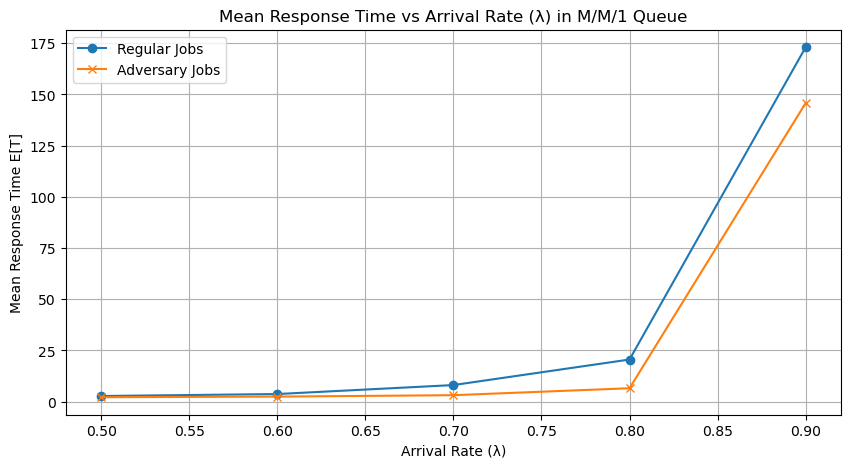

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1/lambda_val, num_jobs)
    # Generate service times for regular jobs using an exponential distribution
    service_times = np.random.exponential(1, num_jobs)
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1/adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using an exponential distribution
        adv_service_times = np.random.exponential(1, adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i-1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs

adv_lambda = 0.15 # Define adversary arrival rate
adv_num_jobs = 5000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time = simulate_mm1_queue(lambda_val, adv_lambda=adv_lambda, adv_num_jobs=adv_num_jobs)
    mean_response_times.append(mean_response_time)
    mean_adv_response_times.append(mean_adv_response_time)
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the results


In [ ]:
"""
Adding code to collect the response time of every completed job and put it into a list 
then turn that list into a distribution while keeping μ equal to 1
"""

λ = 0.5, E[T] (Regular) = 2.6680, E[T] (Adversary) = 2.1944
λ = 0.6, E[T] (Regular) = 4.2536, E[T] (Adversary) = 2.5131
λ = 0.7, E[T] (Regular) = 7.2117, E[T] (Adversary) = 6.8516
λ = 0.8, E[T] (Regular) = 20.3694, E[T] (Adversary) = 8.5799
λ = 0.9, E[T] (Regular) = 267.2353, E[T] (Adversary) = 183.6327


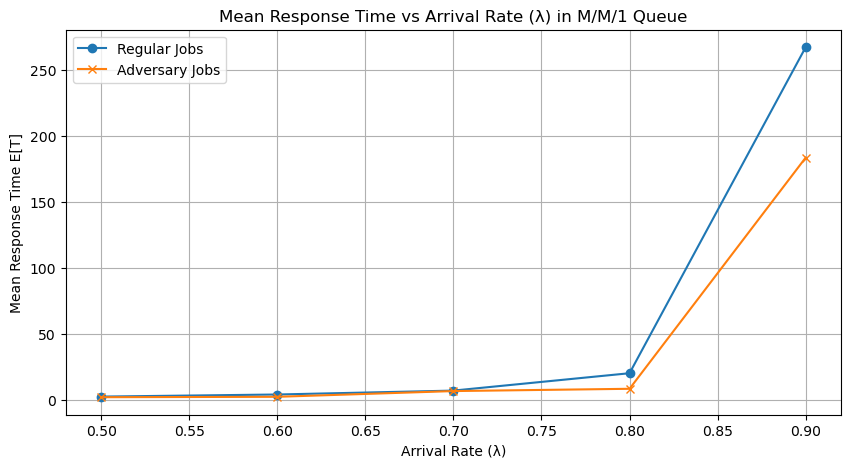

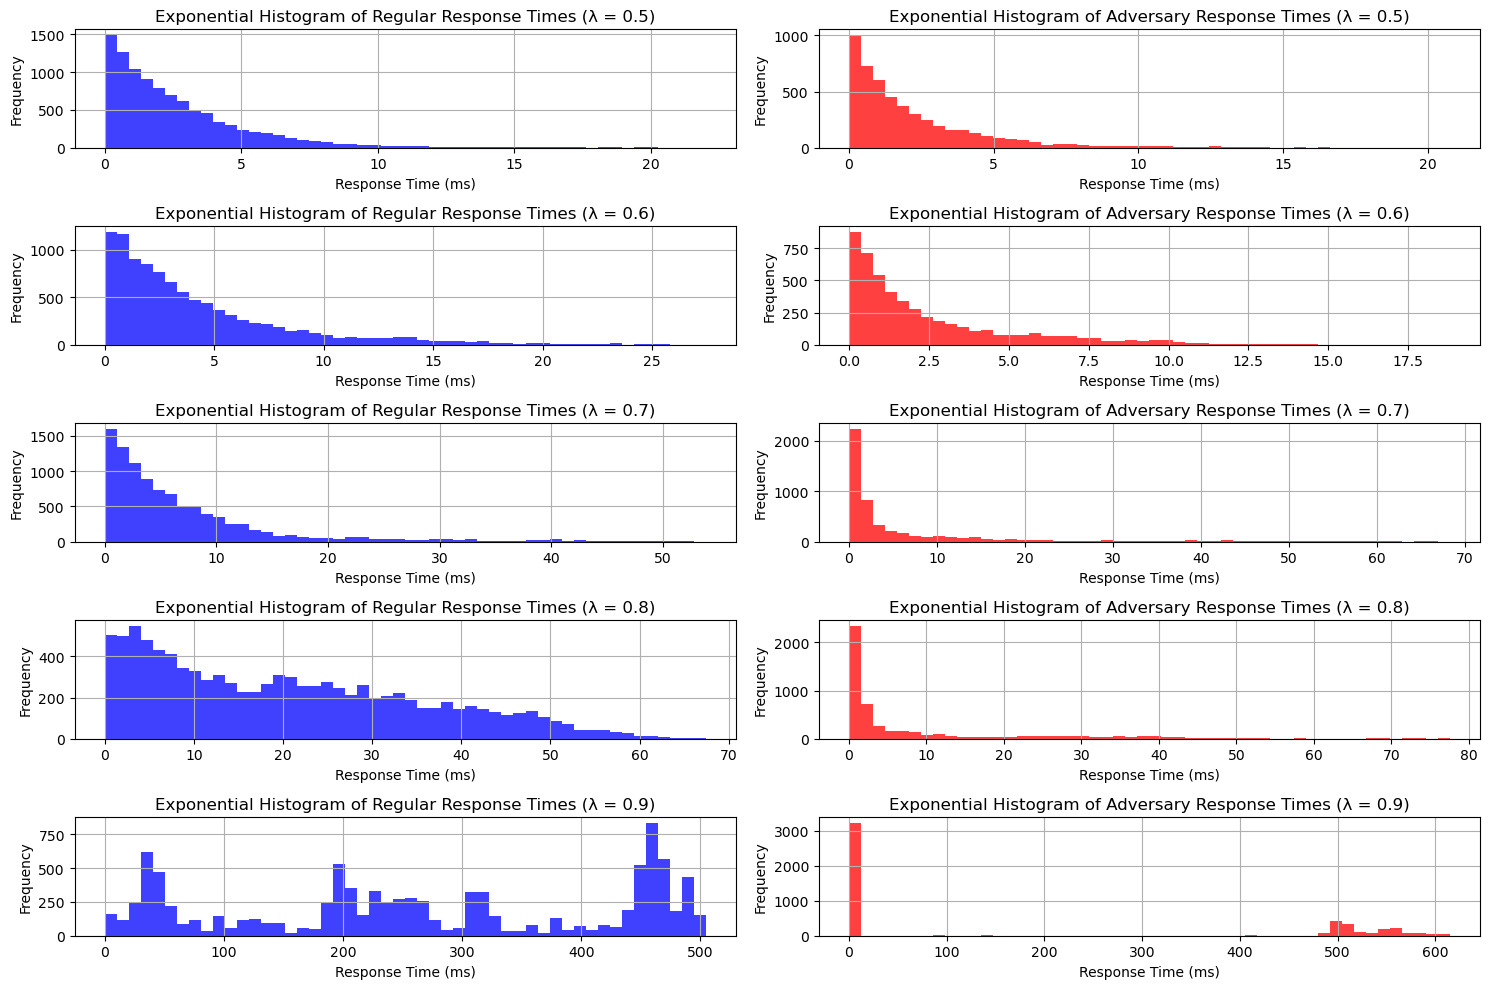

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    # Generate service times for regular jobs using an exponential distribution
    service_times = np.random.exponential(1, num_jobs)
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using an exponential distribution
        adv_service_times = np.random.exponential(1, adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times  # Return the mean response times and separated response times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_response_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular response times
        plt.xlabel('Response Time (ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Exponential Histogram of Regular Response Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time (ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Exponential Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_response_times = []  # Initialize an empty list to store all regular response times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 5000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times = simulate_mm1_queue(lambda_val, adv_lambda=adv_lambda, adv_num_jobs=adv_num_jobs)
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_response_times.append(regular_response_times)  # Append all regular response times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times)  # Plot histograms of response times


In [ ]:
"""
Changing the job size distribution to normal(Gaussion) 
of the regular jobs and see how that affects the shape of the histograms with a mean = 1
"""

λ = 0.5, E[T] (Regular) = 2.2176, E[T] (Adversary) = 1.7906
λ = 0.6, E[T] (Regular) = 3.3593, E[T] (Adversary) = 2.0879
λ = 0.7, E[T] (Regular) = 4.4580, E[T] (Adversary) = 2.9762
λ = 0.8, E[T] (Regular) = 10.9688, E[T] (Adversary) = 2.7925
λ = 0.9, E[T] (Regular) = 317.8332, E[T] (Adversary) = 224.7197


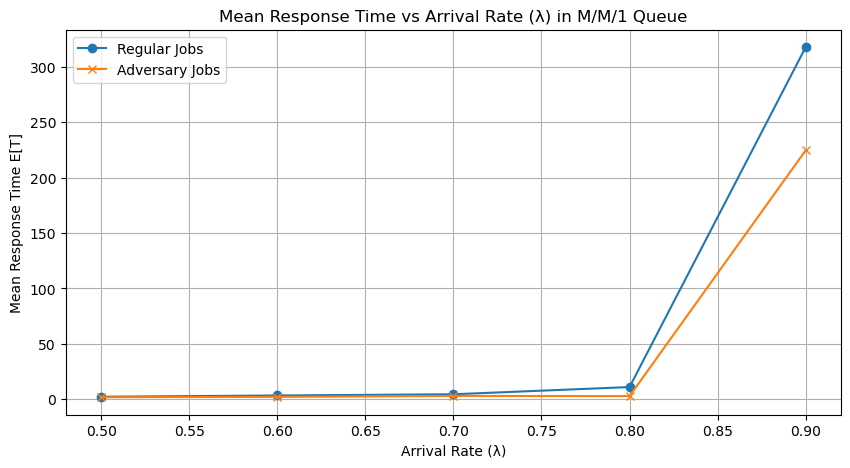

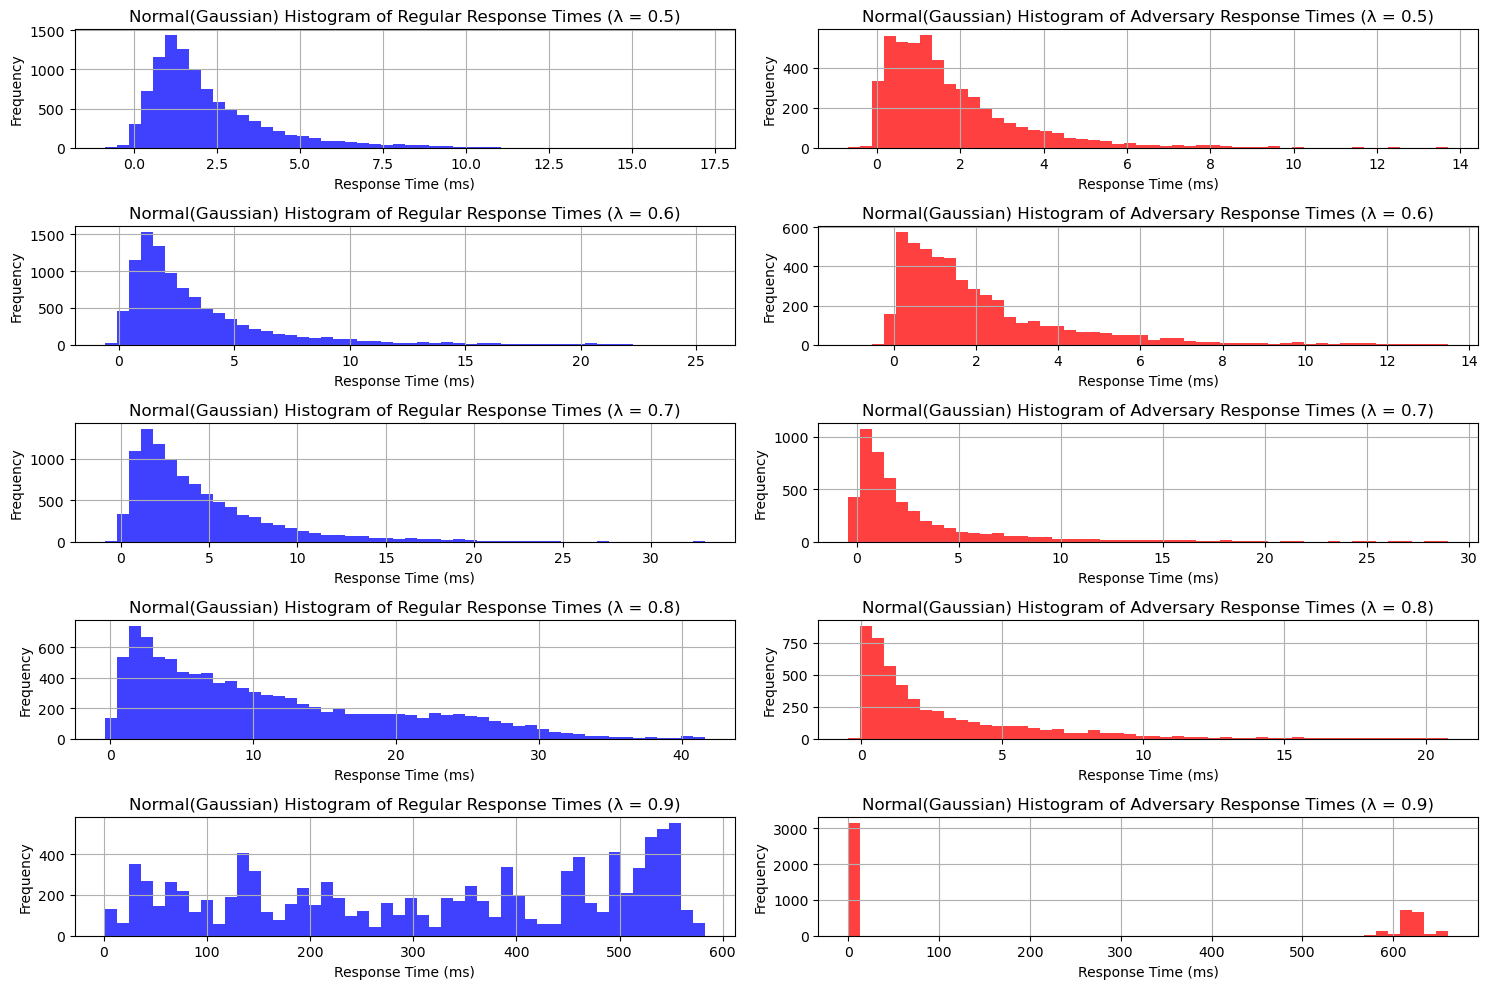

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0, service_mean=1.0, service_std=0.5):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    # Generate service times for regular jobs using a normal distribution
    service_times = np.random.normal(loc=service_mean, scale=service_std, size=num_jobs)
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using an exponential distribution
        adv_service_times = np.random.exponential(1, adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_response_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular response times
        plt.xlabel('Response Time (ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Normal(Gaussian) Histogram of Regular Response Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time (ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Normal(Gaussian) Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_response_times = []  # Initialize an empty list to store all regular response times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 5000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times = simulate_mm1_queue(lambda_val, adv_lambda=adv_lambda, adv_num_jobs=adv_num_jobs, service_mean=1.0, service_std=0.5)
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_response_times.append(regular_response_times)  # Append all regular response times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times)  # Plot histograms of response times


In [ ]:
"""
Changing the job size distribution to pareto
of the regular jobs and see how that affects the shape of the histograms with a mean = 1
"""

λ = 0.5, E[T] (Regular) = 1.2698, E[T] (Adversary) = 1.2236
λ = 0.6, E[T] (Regular) = 1.3986, E[T] (Adversary) = 1.3051
λ = 0.7, E[T] (Regular) = 1.5650, E[T] (Adversary) = 1.3303
λ = 0.8, E[T] (Regular) = 1.8230, E[T] (Adversary) = 1.4138
λ = 0.9, E[T] (Regular) = 2.0491, E[T] (Adversary) = 1.4878


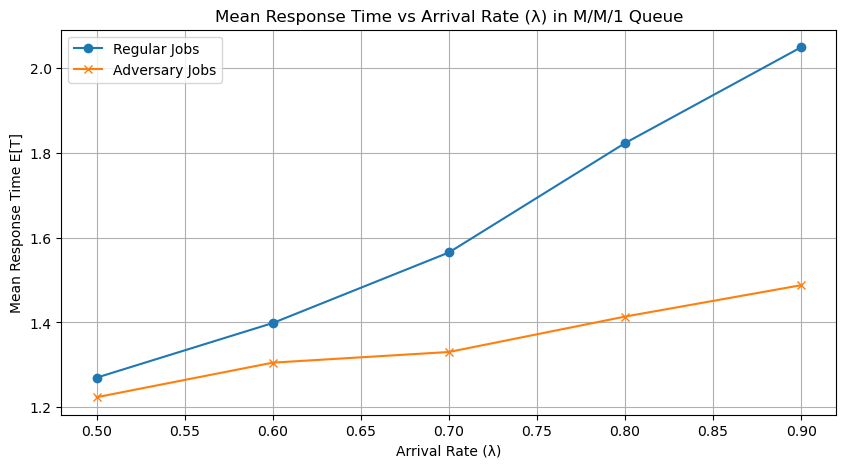

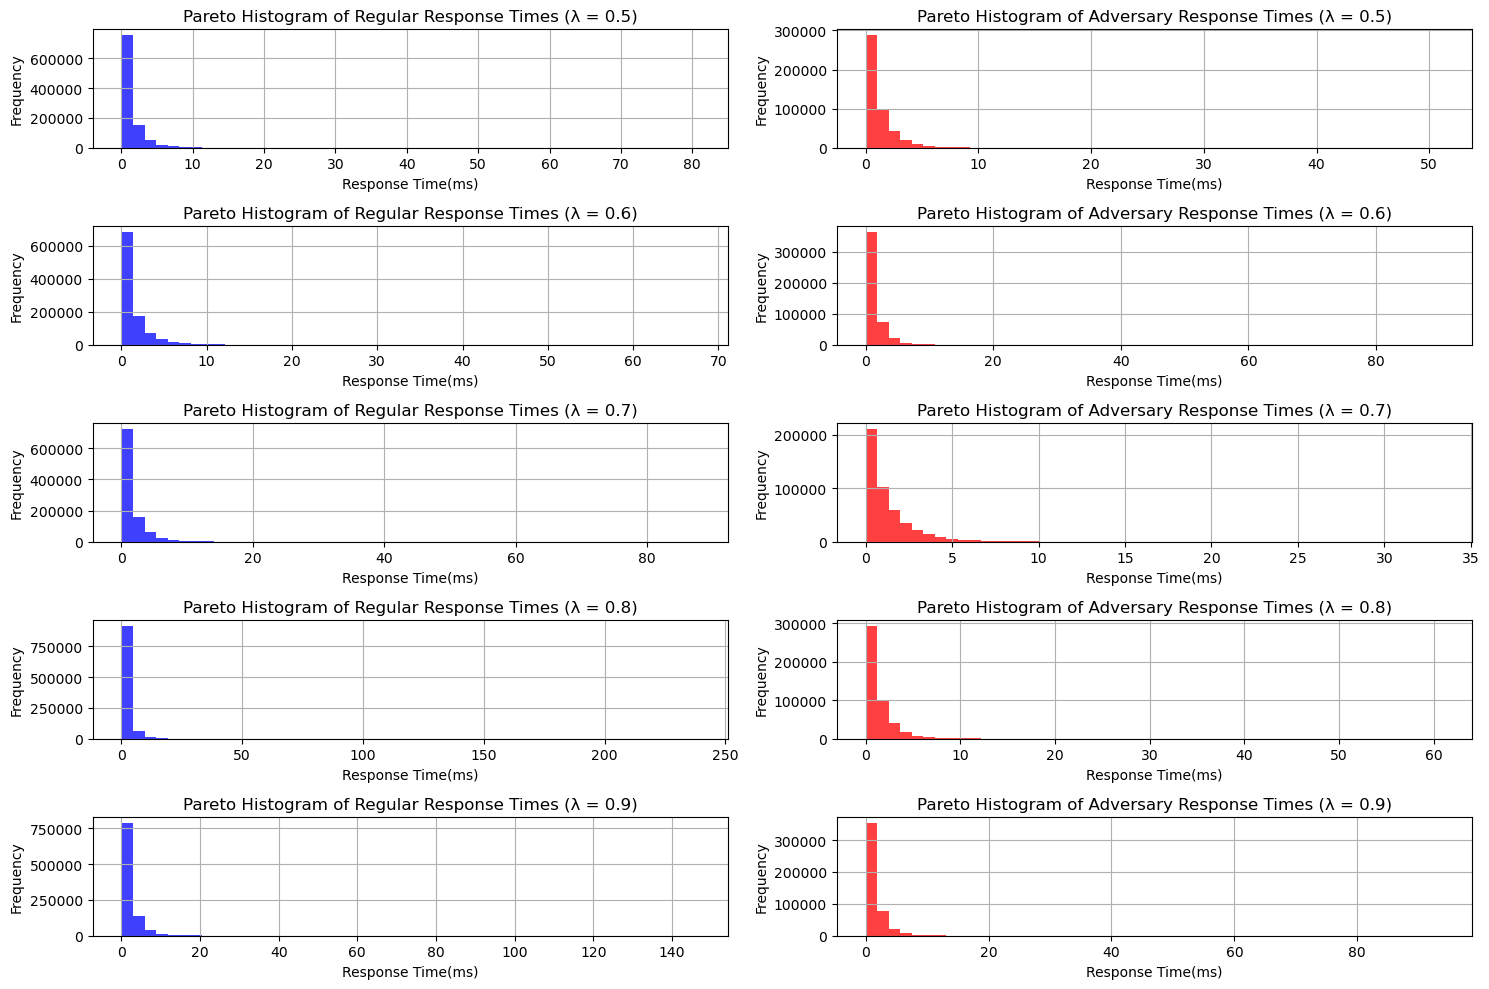

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=1000000, adv_lambda=None, adv_num_jobs=0, shape=3.0):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    
    # Generate service times for regular jobs using a Pareto distribution
    scale = 1.0  # Scale parameter for Pareto distribution to achieve mean 1
    service_times = np.random.pareto(shape, num_jobs) * scale
    
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using an exponential distribution
        adv_service_times = np.random.exponential(1, adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_response_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular response times
        plt.xlabel('Response Time(ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Pareto Histogram of Regular Response Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time(ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Pareto Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_response_times = []  # Initialize an empty list to store all regular response times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 470000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times = simulate_mm1_queue(lambda_val, adv_lambda=adv_lambda, adv_num_jobs=adv_num_jobs, shape=3.0)
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_response_times.append(regular_response_times)  # Append all regular response times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times)  # Plot histograms of response times


In [ ]:
"""
Changing the job size distribution to Weibull
of the regular jobs and see how that affects the shape of the histograms with a mean = 1
"""

λ = 0.5, E[T] (Regular) = 1.9345, E[T] (Adversary) = 1.5322
λ = 0.6, E[T] (Regular) = 2.4264, E[T] (Adversary) = 1.8406
λ = 0.7, E[T] (Regular) = 3.1925, E[T] (Adversary) = 1.9164
λ = 0.8, E[T] (Regular) = 4.4755, E[T] (Adversary) = 2.7233
λ = 0.9, E[T] (Regular) = 8.0313, E[T] (Adversary) = 6.9074


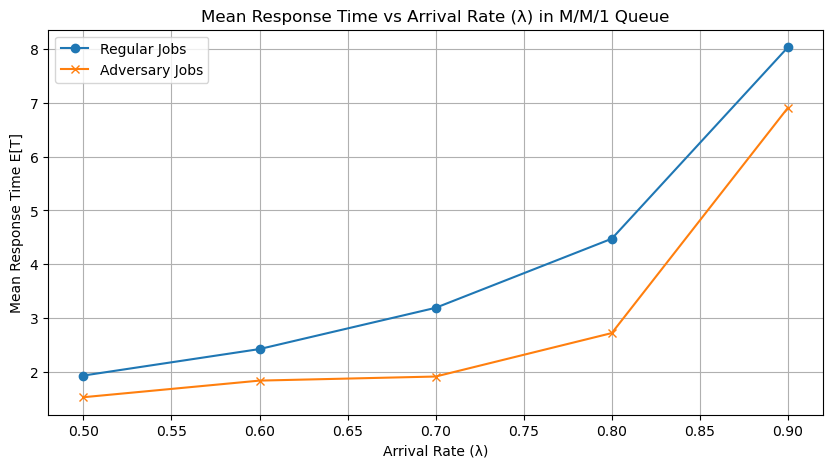

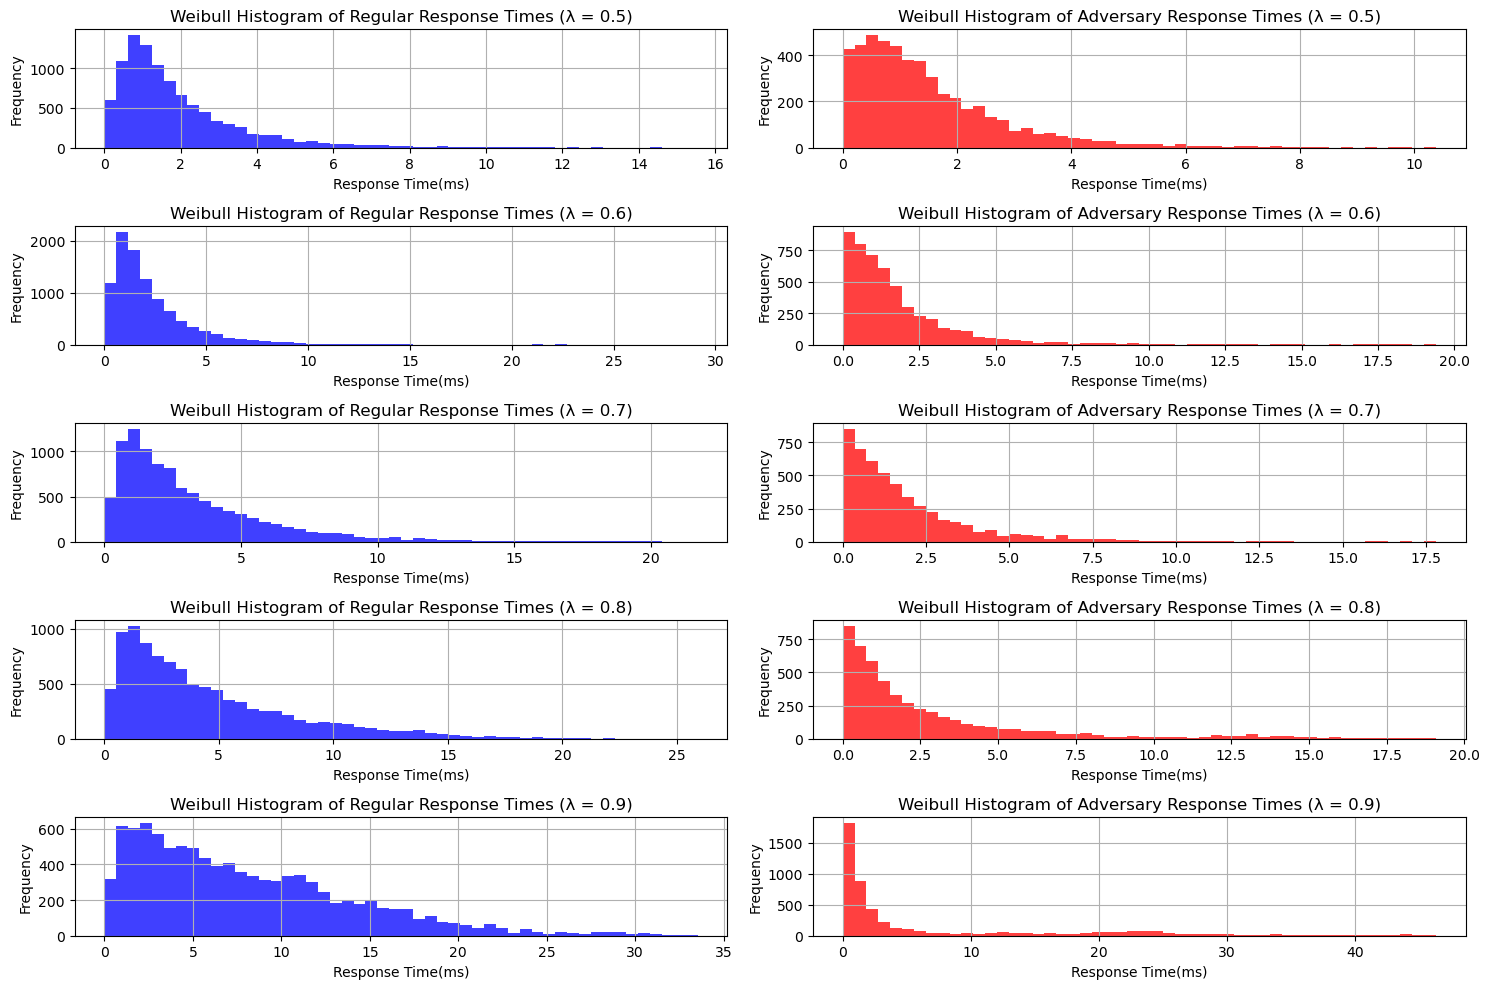

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0, shape=2.0):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    
    # Generate service times for regular jobs using a Weibull distribution
    scale = 1.0  # Scale parameter for Weibull distribution to achieve mean 1
    service_times = np.random.weibull(shape, num_jobs) * scale
    
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using an exponential distribution
        adv_service_times = np.random.exponential(1, adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_response_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular response times
        plt.xlabel('Response Time(ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Weibull Histogram of Regular Response Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time(ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Weibull Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_response_times = []  # Initialize an empty list to store all regular response times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 5000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times = simulate_mm1_queue(lambda_val, adv_lambda=adv_lambda, adv_num_jobs=adv_num_jobs, shape=2.0)
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_response_times.append(regular_response_times)  # Append all regular response times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times)  # Plot histograms of response times
